# Predictive algorithms for stock valuation

## 1) Features - independent variables

### Technical indicators

Stock market investing fundamentals:
* volatility
* bollinger bands
* moving average, exponentially weighted
* parabolic stop & reverse
* relative strength indicator
* stochastic oscillator

Material: *Understanding Indicators in Technical Analysis* (2020) Charles D. Kirkpatrick
    
### Macroeconomics indicators

Although macroeconomics are often used for the money market and the debt market, we will test to establish significance of macro indicators in the stock market

An assumption is that stock prices are significantly influenced by irrational waves of optimism and pessimism among investors, hence we expect macro indicators to weigh less in the stock prediction

Indicators are as follow:
* Inflation 
* Money supply
* Interest rates
* Unemployment
* Balance of payments
* Value of currency
* Business cycle
* Gold price

Material: *Macroeconomic indicators and capital market performance: Are the links sustainable?* (2020) Felicia O. Olokoyo

### Corporate finance ratios and indicators

* Dividend Discount Model (DDM)
* Discounted Cash Flow model (DCF)
* Capital Asset Pricing Model (CAPM)
* Expected return, dividend yield
* Price to earnings ratio (P/E)
* Payout ratio
* Default spread
* Yield on treasury bill

Material: *Monte Carlo Simulation in Financial Valuation* (2014) Magnus Erik Hvass Pedersen
*Chapter 5: Stock Valuation* Professor Thomson

## 2) Benchmark models

Isn't specified but all modelling will include steps like data scaling, one-hot encoding, data visualization, train test split, and measuring performance

### Primary model: Grammatical Evolution

Looking for further guidance on processes to apply GE

Model specifications:
* Metric definition in the search space
* Genotypes and phenotypes structures
* Establishing Backus-Naur Form (BNF) Grammar
* Mapping from genotype to phenotype if candidate has a good fitness
* All non-terminals are transformed into terminals and a complete phenotype is generated
* Mutation & Crossovers
* Python libraries: GRAPE, libGE or PonyGE2

Material: *On the Locality of Grammatical Evolution* (2005) Franz Rothlauf and Marie Oetzel

*Grammatical evolution* (2001) C.Ryan, O'Neill

### Benchmark 1- Recurrent Neural Network (RNN) - Long short term memory (LSTM) 

Model characteristics:
LSTM has three gates, and number of LSTM layers, dropout value, and number of epochs can be tweaked

* Input gate: adds information to the cell state
* Forget gate: removes the information that is no longer required by the model
* Output gate: selects the information to be shown as output

Material: *Stock Market prediction using CNN-LSTM* (2021) Adhitya A

### Benchmark 2- Genetic algorithms - NeuroEvolution of Augmented Topologies (NEAT)

Model specifications:
* Genotype initialization -> (evaluation -> crossover & mutation) for x generations
* Define number of inputs, hidden, and output layers, along with bias values
* Weight space explored via crossover of network weights and mutation of a single network's weight
* Fitness function

Material: *Prediction the stock market with genetic programming* (2017) David Moskowitz

Github NEAT MattKallada

### Benchmark 3- Vector auto regressive model 

Model characteristics:
* Testing causation (Granger’s Causality)
* Cointegration test
* Check for stationarity and make the time series stationary
* (p) selection of VAR(p) model with Partial AutoCorrelation Function (PACF)
* Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

*Vector Autoregression (VAR) Comprehensive Guide with Examples in Python* (2019) Selva Prabhakaran

*Data Analysis, ML and applications* (2007) C.Preisach, H.Burkhardt, p.499-507

### Benchmark 4- Monte Carlo simulation

Model specifications:
* Predicts the worst likely loss for a portfolio given a confidence interval over a specified time horizon
* Uses repeated random sampling to obtain the likelihood of a range of results of occurring
* Determine probability distributions and dependencies
* Determine the required number of Monte Carlo iterations

Material: *Stock Valuation using Monte Carlo Simulation and Statistical Analysis* (2020) Shreyas Khalkar, Neel Mehta

### Benchmarks performance - fitness

* mean absolute deviation (MAD)
* root mean squared error (RMSE)
* mean absolute error (MAE)
* mean squared error (MSE)
* return on equity (ROE) 
* return on assets (ROA) 
* return on investment (ROI)

## 3) Other model specifications

### Statistics & time series analysis

If the dependent and at least one of the independent variables are non-stationary, the relationship between expected returns and fundamental variables might be spurious

We expect that extreme returns cannot be predicted with these models.

* Gauss-Markov OLS assumptions
* Multicollinearity within independent variables (bivariate correlation matrix)
* Test for stationarity (augmented dickey fuller)
* Test for seasonality (ljung-box, buys ballot table)
* Volatility decomposition aka forecast error variance decomposition (manova, mancova)
* Generalized Auto Regressive Conditional Heteroskedasticity (GARCH) for volatility
* Stationary stock returns vs stock prices
* Value at risk (VaR) with monte carlo simulation
* Log returns aka continuous compounded returns & log-linear approximations
* Likelihood-ratio test
* Lag length selection with Information Criterion, Akaike (AIC), Bayes (BIC) or Hannan-Quinn (HQC) 

Material: *A Guide to Modern Econometrics* (2004) Marno Verbeek

*Lag Length Selection in Vector Autoregressive Models: Symmetric and Asymmetric Lags* Omer Ozcicek

*Stock Market Volatility and Return Analysis: A Systematic Literature Review* (2020) Roni Bhowmik and Shouyang Wang

### Dataset

* Python api Yahoo finance
* Data is composed of closing, high, low, volume & adjusted close
* Macroeconomics indicators from Federal Reserve (fred)

### Python libraries

* pandas, numpy (data manipulation)
* matplotlib (plot)
* sklearn, Keras (data processing, performance metrics, machine learning)
* TA-lib (technical analysis)
* scipy, statsmodels, Kats, Auto_TimeSeries, prophet (statistics & time series)
* DEAP, pyeasyga, GRAPE, libGE or PonyGE2 (evolutionary, genetic algorithm, grammatical evolution)

Material: *Python open source libraries for scaling time series forecasting solutions* (2021) Francesca Lazzeri

In [1]:
from numpy import log

# plotting
import matplotlib.pyplot as plt

# data fetching and manipulation
from fredapi import Fred
import fredapi as fa
import pandas as pd
import pandas_datareader as pdr
import requests

# statistical hypothesis testing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

# ssl issues
import ssl 
try:
    _create_unverified_https_context = ssl._create_unverified_context 
except AttributeError: 
    pass 
else: 
    ssl._create_default_https_context = _create_unverified_https_context

## Fetch macro-indicators data with the Federal Reserve API (fred)

In [2]:
# get api key on fred and then input it as parameter 
fred = Fred(api_key='c0c638b17725352b38944335b73d1fe2')
data = fred.get_series('SP500')

In [3]:
# look up for data about any macro economic indicator
fred.search('treasury bill').T
#fred.search('unemployment').T
#fred.search('inflation').T
#fred.search('interest rate').T

series id,TB3MS,DTB3,WTB3MS,DGS1MO,GS1M,WGS1MO,DTB1YR,TB1YR,WTB1YR,DGS6MO,...,NJSLIND,ARSLIND,NHSLIND,MTSLIND,SDSLIND,WOTHAST,RREP1690,WOFRAL,CPTBSD678FRBCLE,CMRKTSD678FRBCLE
id,TB3MS,DTB3,WTB3MS,DGS1MO,GS1M,WGS1MO,DTB1YR,TB1YR,WTB1YR,DGS6MO,...,NJSLIND,ARSLIND,NHSLIND,MTSLIND,SDSLIND,WOTHAST,RREP1690,WOFRAL,CPTBSD678FRBCLE,CMRKTSD678FRBCLE
realtime_start,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,...,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00
realtime_end,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,...,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00,2022-02-11 00:00:00
title,3-Month Treasury Bill Secondary Market Rate,3-Month Treasury Bill Secondary Market Rate,3-Month Treasury Bill Secondary Market Rate,Market Yield on U.S. Treasury Securities at 1-...,Market Yield on U.S. Treasury Securities at 1-...,Market Yield on U.S. Treasury Securities at 1-...,1-Year Treasury Bill Secondary Market Rate,1-Year Treasury Bill Secondary Market Rate,1-Year Treasury Bill Secondary Market Rate,Market Yield on U.S. Treasury Securities at 6-...,...,Leading Index for New Jersey,Leading Index for Arkansas,Leading Index for New Hampshire,Leading Index for Montana,Leading Index for South Dakota,Assets: Other Factors Supplying Reserve Balanc...,Liabilities and Capital: Liabilities: Reverse ...,Assets: Other Factors Supplying Reserve Balanc...,Contributions to the Cleveland Financial Stres...,Contributions to the Cleveland Financial Stres...
observation_start,1934-01-01 00:00:00,1954-01-04 00:00:00,1954-01-08 00:00:00,2001-07-31 00:00:00,2001-07-01 00:00:00,2001-08-03 00:00:00,1959-07-15 00:00:00,1959-07-01 00:00:00,1959-07-17 00:00:00,1981-09-01 00:00:00,...,1982-01-01 00:00:00,1982-01-01 00:00:00,1982-01-01 00:00:00,1982-01-01 00:00:00,1982-01-01 00:00:00,1988-11-30 00:00:00,2002-12-18 00:00:00,2002-12-18 00:00:00,1991-09-25 00:00:00,1991-09-25 00:00:00
observation_end,2022-01-01 00:00:00,2022-02-10 00:00:00,2022-02-04 00:00:00,2022-02-10 00:00:00,2022-01-01 00:00:00,2022-02-04 00:00:00,2022-02-10 00:00:00,2022-01-01 00:00:00,2022-02-04 00:00:00,2022-02-10 00:00:00,...,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2022-02-09 00:00:00,2022-02-09 00:00:00,2022-02-09 00:00:00,2016-05-05 00:00:00,2016-05-05 00:00:00
frequency,Monthly,Daily,"Weekly, Ending Friday",Daily,Monthly,"Weekly, Ending Friday",Daily,Monthly,"Weekly, Ending Friday",Daily,...,Monthly,Monthly,Monthly,Monthly,Monthly,"Weekly, Ending Wednesday","Weekly, As of Wednesday","Weekly, As of Wednesday",Daily,Daily
frequency_short,M,D,W,D,M,W,D,M,W,D,...,M,M,M,M,M,W,W,W,D,D
units,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,Percent,...,Percent,Percent,Percent,Percent,Percent,Billions of U.S. Dollars,Millions of U.S. Dollars,Millions of U.S. Dollars,Units of Stress,Units of Stress
units_short,%,%,%,%,%,%,%,%,%,%,...,%,%,%,%,%,Bil. of U.S. $,Mil. of U.S. $,Mil. of U.S. $,Units of Stress,Units of Stress


## 1st use case: 3-Month Treasury Bill Secondary Market Rate (DTB3), daily data

In [4]:
# fetch data with series id
data = fred.get_series_first_release('DTB3')

In [5]:
data.dropna(inplace=True)

In [6]:
# slice data to obtain last 300 days (mondays to fridays)
data = data[-298:-1]

In [7]:
df_dtb3 = pd.DataFrame(data)

In [8]:
df_dtb3.shape

(297, 1)

In [9]:
# get stock closing price, open, high, low, volume, and adjusted close
df_stock = pd.DataFrame(round(pdr.DataReader(f'AAPL', data_source='yahoo'),2))

In [10]:
# -2 because fred api cannot provide for t, but gives t-1 instead
# (gives only wednesday data, friday the 11th right now)
df_stock = df_stock[-300:-2]

In [11]:
df_stock.shape

(298, 6)

In [12]:
# merge the data (original stock data + macro-indicator)
result = pd.concat([df_stock, df_dtb3], axis=1)
result.rename(columns={"value": "dtb3"}, inplace=True)

In [13]:
#result.tail()
#result.head()

In [14]:
# check for any missing values 
result.isnull().values.any()

True

In [15]:
# check how many are there
result.isnull().sum()

High         1
Low          1
Open         1
Close        1
Volume       1
Adj Close    1
dtb3         2
dtype: int64

In [16]:
# check which rows with missing values
nan = result.isnull()
row_has_nan = nan.any(axis=1)
rows_with_nan = result[row_has_nan]
print(rows_with_nan)

              High     Low    Open   Close      Volume  Adj Close  dtb3
2021-04-02     NaN     NaN     NaN     NaN         NaN        NaN  0.02
2021-10-11  144.81  141.81  142.27  142.81  64452200.0     142.42   NaN
2021-11-11  149.43  147.68  148.96  147.87  41000000.0     147.68   NaN


In [17]:
# replace missing values with average of 2 neighbors (interpolation)
result['dtb3'].interpolate('pad',inplace=True)

In [18]:
# in this case we only to replace dtb3 as we want to keep the rest of values, but not vice versa
# drop null values 
result.dropna(inplace=True)

In [19]:
# once there are no nan left, we can get correlation matrix
result.corr()

,High,Low,Open,Close,Volume,Adj Close,dtb3
High,1.000000,0.996356,0.997544,0.996641,-0.002595,0.996566,0.527886
Low,0.996356,1.000000,0.996726,0.996429,-0.066744,0.996521,0.512344
Open,0.997544,0.996726,1.000000,0.992985,-0.028563,0.992988,0.521412
Close,0.996641,0.996429,0.992985,1.000000,-0.036109,0.999952,0.522156
Volume,-0.002595,-0.066744,-0.028563,-0.036109,1.000000,-0.038534,0.123028
Adj Close,0.996566,0.996521,0.992988,0.999952,-0.038534,1.000000,0.520604
dtb3,0.527886,0.512344,0.521412,0.522156,0.123028,0.520604,1.000000


### On the above table we notice a relatively strong correlation (0.52) between the 3-month treasury bill secondary market rate and stock price, along with multicollinearity that we will take care of

## Repeat by adding all necessary macro-indicators

In [20]:
# get rid of high, low, open & close 
result.drop(['High', 'Low', 'Open', 'Close'], axis=1, inplace=True)
result = result[['Adj Close', 'Volume', 'dtb3']]

In [244]:
# search for indicator
fred.search('DJIA').T

series id,DJIA,VXDCLS
id,DJIA,VXDCLS
realtime_start,2022-02-12 00:00:00,2022-02-12 00:00:00
realtime_end,2022-02-12 00:00:00,2022-02-12 00:00:00
title,Dow Jones Industrial Average,CBOE DJIA Volatility Index
observation_start,2012-02-13 00:00:00,1997-10-07 00:00:00
observation_end,2022-02-11 00:00:00,2022-02-10 00:00:00
frequency,"Daily, Close","Daily, Close"
frequency_short,D,D
units,Index,Index
units_short,Index,Index


## 2nd use case: 5-Year Breakeven Inflation Rate (T5YIE)

The breakeven inflation rate represents a measure of expected inflation derived from 5-Year Treasury Constant Maturity Securities and 5-Year Treasury Inflation-Indexed Constant Maturity Securities

In [23]:
# fetch data with series id
data = fred.get_series_first_release('T5YIE')

In [24]:
# slice data to obtain last 300 days (mondays to fridays)
data = data[-311:-2]

In [25]:
df_t5yie = pd.DataFrame(data)

In [26]:
# check which rows with missing values
nan = df_t5yie.isnull()
row_has_nan = nan.any(axis=1)
rows_with_nan = df_t5yie[row_has_nan]
print(rows_with_nan)
# we can see couple of missing values for holidays and such

           value
date            
2020-12-25   NaT
2021-01-01   NaT
2021-01-18   NaT
2021-02-15   NaT
2021-05-31   NaT
2021-07-05   NaT
2021-09-06   NaT
2021-10-11   NaT
2021-11-11   NaT
2021-11-25   NaT
2021-12-24   NaT
2022-01-17   NaT


In [27]:
# so we drop
df_t5yie.dropna(inplace=True)

In [28]:
# merge the data (original stock data + macro-indicator)
result1 = pd.concat([result, df_t5yie], axis=1)
result1.rename(columns={"value": "t5yie"}, inplace=True)

In [29]:
result1.tail(20)

,Adj Close,Volume,dtb3,t5yie
2022-01-12,175.31,74805200.0,0.12,2.82
2022-01-13,171.97,84505800.0,0.12,2.77
2022-01-14,172.85,80355000.0,0.13,2.79
2022-01-18,169.58,90956700.0,0.17,2.8
2022-01-19,166.02,94815000.0,0.17,2.73
2022-01-20,164.30,91420500.0,0.18,2.74
2022-01-21,162.20,122848900.0,0.17,2.7
2022-01-24,161.41,162294600.0,0.20,2.74
2022-01-25,159.58,115798400.0,0.20,2.78
2022-01-26,159.49,108275300.0,0.19,2.75


In [30]:
nan = result1.isnull()
row_has_nan = nan.any(axis=1)
rows_with_nan = result1[row_has_nan]
print(rows_with_nan)

            Adj Close      Volume  dtb3 t5yie
2021-04-02        NaN         NaN   NaN  2.58
2021-10-11     142.42  64452200.0  0.05   NaN
2021-11-11     147.68  41000000.0  0.05   NaN


In [32]:
result1['t5yie'].interpolate('pad', inplace=True)

In [33]:
result1.dropna(inplace=True)

In [34]:
# once there are no nan left, we can get correlation matrix
result1.corr()

,Adj Close,Volume,dtb3,t5yie
Adj Close,1.000000,-0.038534,0.520604,0.583781
Volume,-0.038534,1.000000,0.123028,-0.202028
dtb3,0.520604,0.123028,1.000000,0.038348
t5yie,0.583781,-0.202028,0.038348,1.000000


### Yet again,  we notice a relatively strong correlation (0.50) between the 10-Y breakeven inflation rate and stock price, although dtb3 and t10yie seem to be uncorrelated

## 3rd: 5-Year Forward Inflation Expectation Rate (T5YIFR)

This series is a measure of expected inflation (on average) over the five-year period that begins five years from today

In [35]:
# fetch data with series id
data = fred.get_series_first_release('T5YIFR')

# slice data to obtain last 300 days (mondays to fridays)
data = data[-311:-2]

In [36]:
df_t5yifr = pd.DataFrame(data)

In [37]:
# so we drop
df_t5yifr.dropna(inplace=True)

In [160]:
# merge the data (original stock data + macro-indicator)
result2 = pd.concat([result1, df_t5yifr], axis=1)
result2.rename(columns={"value": "t5yifr"}, inplace=True)

In [161]:
result2.head(20)

,Adj Close,Volume,dtb3,t5yie,t5yifr
2020-12-04,121.35,78260400.0,0.09,1.83,1.95
2020-12-07,122.84,86712000.0,0.08,1.84,1.92
2020-12-08,123.46,82225500.0,0.09,1.84,1.94
2020-12-09,120.88,115089200.0,0.08,1.84,1.98
2020-12-10,122.33,81312200.0,0.08,1.83,1.93
2020-12-11,121.51,86939800.0,0.08,1.82,1.92
2020-12-14,120.88,79184500.0,0.09,1.84,1.92
2020-12-15,126.93,157243700.0,0.08,1.86,1.96
2020-12-16,126.87,98208600.0,0.09,1.90,1.94
2020-12-17,127.75,94359800.0,0.08,1.90,1.98


In [162]:
result2['t5yifr'].interpolate('pad', inplace=True)

result2.dropna(inplace=True)

In [163]:
# once there are no nan left, we can get correlation matrix
result2.corr()

,Adj Close,Volume,dtb3,t5yie,t5yifr
Adj Close,1.000000,-0.038534,0.520604,0.583781,0.160547
Volume,-0.038534,1.000000,0.123028,-0.202028,-0.457544
dtb3,0.520604,0.123028,1.000000,0.038348,-0.377734
t5yie,0.583781,-0.202028,0.038348,1.000000,0.589088
t5yifr,0.160547,-0.457544,-0.377734,0.589088,1.000000


## 4th: Market Yield on U.S. Treasury Securities at 1-Year Constant Maturity (DGS1)

Constant maturity is an adjustment for equivalent maturity, used by the Federal Reserve Board to compute an index based on the average yield of various Treasury securities (bonds) maturing at different periods

In [164]:
# fetch data with series id
data = fred.get_series_first_release('DGS1')

In [165]:
# slice data to obtain last 300 days (mondays to fridays)
data = data[-310:-2]

df_dgs1 = pd.DataFrame(data)

# so we drop
df_dgs1.dropna(inplace=True)

In [223]:
# merge the data (original stock data + macro-indicator)
result3 = pd.concat([result2, df_dgs1], axis=1)
result3.rename(columns={"value": "dgs1"}, inplace=True)

result3.head()

,Adj Close,Volume,dtb3,t5yie,t5yifr,dgs1
2020-12-04,121.35,78260400.0,0.09,1.83,1.95,0.11
2020-12-07,122.84,86712000.0,0.08,1.84,1.92,0.1
2020-12-08,123.46,82225500.0,0.09,1.84,1.94,0.1
2020-12-09,120.88,115089200.0,0.08,1.84,1.98,0.1
2020-12-10,122.33,81312200.0,0.08,1.83,1.93,0.1


In [224]:
result3['dgs1'].interpolate('pad', inplace=True)

result3.dropna(inplace=True)

In [225]:
# corr matrix
result3.corr()

,Adj Close,Volume,dtb3,t5yie,t5yifr,dgs1
Adj Close,1.000000,-0.038534,0.520604,0.583781,0.160547,0.712898
Volume,-0.038534,1.000000,0.123028,-0.202028,-0.457544,0.109229
dtb3,0.520604,0.123028,1.000000,0.038348,-0.377734,0.873011
t5yie,0.583781,-0.202028,0.038348,1.000000,0.589088,0.400805
t5yifr,0.160547,-0.457544,-0.377734,0.589088,1.000000,-0.189532
dgs1,0.712898,0.109229,0.873011,0.400805,-0.189532,1.000000


In [226]:
result3.describe()

,Adj Close,Volume,dtb3,t5yie,t5yifr,dgs1
count,298.000000,2.980000e+02,298.000000,298.000000,298.000000,298.000000
mean,142.327081,9.231984e+07,0.059362,2.527550,2.157685,0.151242
std,16.789955,2.950136e+07,0.044615,0.275193,0.113130,0.171390
min,115.670000,4.100000e+07,0.010000,1.820000,1.910000,0.040000
25%,127.977500,7.130068e+07,0.040000,2.430000,2.080000,0.070000
50%,141.470000,8.744580e+07,0.050000,2.530000,2.160000,0.080000
75%,149.807500,1.074986e+08,0.060000,2.710000,2.240000,0.127500
max,181.780000,1.954327e+08,0.280000,3.170000,2.410000,0.910000


## 5th: Overnight Reverse Repurchase Agreements: Treasury Securities Sold by the Federal Reserve in the Temporary Open Market Operations (RRPONTSYD)

This series is constructed as the aggregated daily amount value of the RRP transactions reported by the New York Fed as part of the Temporary Open Market Operations.

Temporary open market operations involve short-term repurchase and reverse repurchase agreements that are designed to temporarily add or drain reserves available to the banking system and influence day-to-day trading in the federal funds market

In [ ]:
# fetch data with series id
data = fred.get_series_first_release('RRPONTSYD')

# slice data to obtain last 300 days (mondays to fridays)
data = data[-311:-2]

df_t5yifr = pd.DataFrame(data)

# so we drop
df_t5yifr.dropna(inplace=True)

In [ ]:
# merge the data (original stock data + macro-indicator)
result4 = pd.concat([result3, df_t5yifr], axis=1)
result4.rename(columns={"value": "rrpontsyd"}, inplace=True)

result4.head(20)

In [ ]:
result4['rrpontsyd'].interpolate('pad', inplace=True)

result4.dropna(inplace=True)

In [ ]:
# once there are no nan left, we can get correlation matrix
result4.corr()

## Augmented Dickey Fuller test for stationarity

* Avoid spurious correlations when series arent stationary 
* Null Hypothesis (H0): if failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary; and has some time dependent structure
* Alternate Hypothesis (H1): the null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary; and does not have time-dependent structure
* p-value > 0.05: fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary
* p-value <= 0.05: reject the null hypothesis (H0), the data does not have a unit root and is stationary

In [227]:
for e in result3.columns:
    result = adfuller(result3[e])
    print(f'\n{e}')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


Adj Close
ADF Statistic: -0.661693
p-value: 0.856424
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572

Volume
ADF Statistic: -6.757356
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572

dtb3
ADF Statistic: 0.518043
p-value: 0.985411
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572

t5yie
ADF Statistic: -2.394313
p-value: 0.143348
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572

t5yifr
ADF Statistic: -3.107899
p-value: 0.025974
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572

dgs1
ADF Statistic: 6.163161
p-value: 1.000000
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572


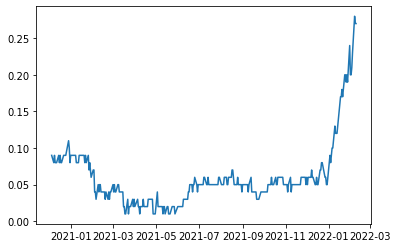

In [228]:
# visualize the non-stationarity
plt.plot(result3['dtb3'])
plt.show()

## Removing trend from non-stationary variables

Adj Close initial variable


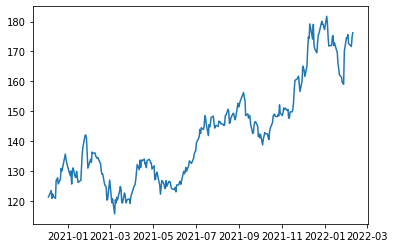

Adj Close log transformation


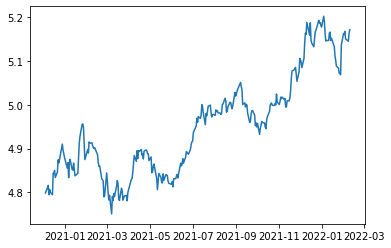


Adj Close
ADF Statistic: -0.826711
p-value: 0.811150
	1%: -3.453
	5%: -2.871
	10%: -2.572
Volume initial variable


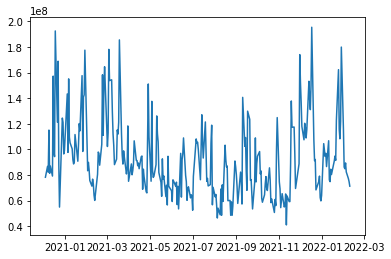

Volume log transformation


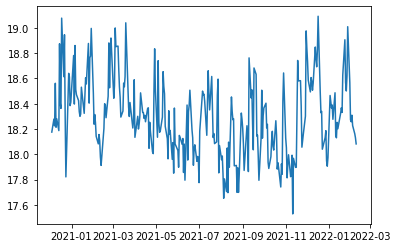


Volume
ADF Statistic: -6.328136
p-value: 0.000000
	1%: -3.453
	5%: -2.871
	10%: -2.572
dtb3 initial variable


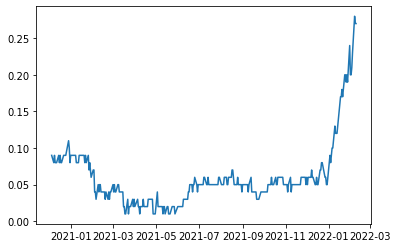

dtb3 log transformation


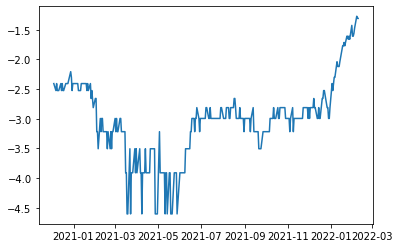


dtb3
ADF Statistic: -0.549886
p-value: 0.881909
	1%: -3.453
	5%: -2.871
	10%: -2.572
t5yie initial variable


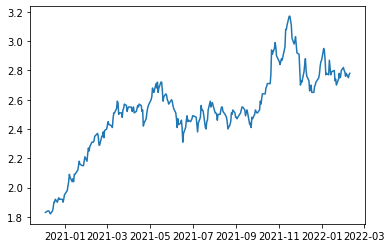

t5yie log transformation


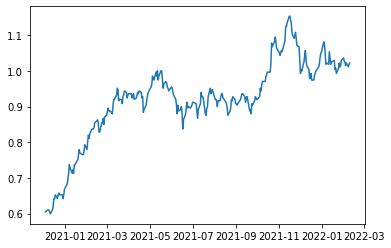


t5yie
ADF Statistic: -2.652065
p-value: 0.082707
	1%: -3.453
	5%: -2.871
	10%: -2.572
t5yifr initial variable


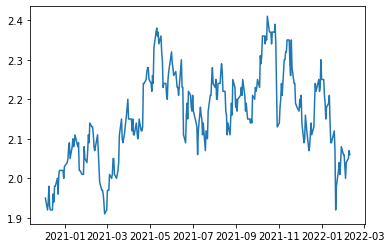

t5yifr log transformation


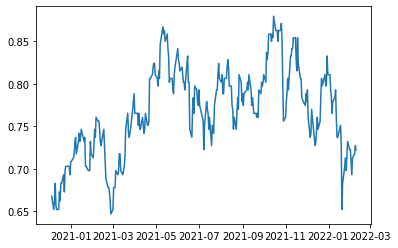


t5yifr
ADF Statistic: -3.119749
p-value: 0.025126
	1%: -3.453
	5%: -2.871
	10%: -2.572
dgs1 initial variable


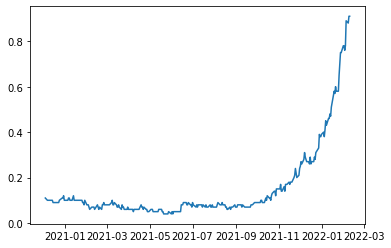

dgs1 log transformation


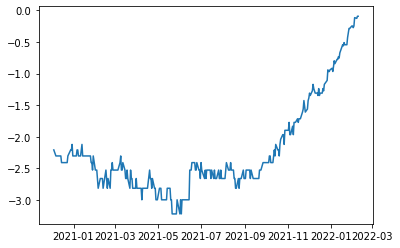


dgs1
ADF Statistic: 2.281095
p-value: 0.998943
	1%: -3.453
	5%: -2.871
	10%: -2.572


In [229]:
#from numpy import log
for e in result3.columns:
    print(f'{e} initial variable')
    plt.figure()
    plt.plot(result3[e])
    plt.show()
    result3[e] = log(result3[e])
    adf = adfuller(result3[e])
    print(f'{e} log transformation')
    plt.figure()
    plt.plot(result3[e])
    plt.show()
    print(f'\n{e}')
    print('ADF Statistic: %f' % adf[0])
    print('p-value: %f' % adf[1])
    for key, value in adf[4].items():
        print('\t%s: %.3f' % (key, value))

Adj Close after differenciation


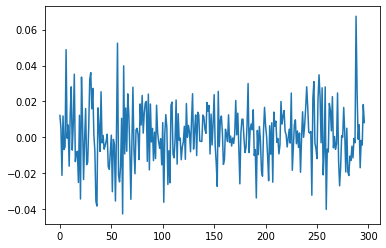

dtb3 after differenciation


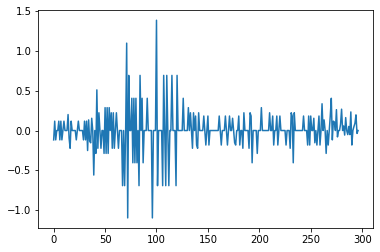

dgs1 after differenciation


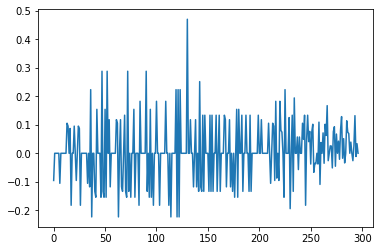

In [184]:
# by differencing
for e in result3.columns:
    diff = list()
    #diff = pd.DataFrame()
    if adfuller(result3[e])[1] > 0.1:
        print(e, 'after differenciation')
        for i in range(1, len(result3)):
            value = result3[e][i] - result3[e][i-1]
            diff.append(value)
        plt.plot(diff)
        plt.show()
        diff.insert(0, 0) # fill 1st value with 0
        result3[e] = diff # replace each variable by their differenciation
result3.drop(result3.index[0], inplace=True)

In [185]:
result3.corr()

,Adj Close,Volume,dtb3,t5yie,t5yifr,dgs1
Adj Close,1.000000,-0.060640,0.098586,0.013539,0.032262,0.050733
Volume,-0.060640,1.000000,-0.014780,-0.225352,-0.486518,-0.014252
dtb3,0.098586,-0.014780,1.000000,0.036925,0.034565,0.084571
t5yie,0.013539,-0.225352,0.036925,1.000000,0.593070,0.087225
t5yifr,0.032262,-0.486518,0.034565,0.593070,1.000000,0.062347
dgs1,0.050733,-0.014252,0.084571,0.087225,0.062347,1.000000


In [186]:
# last check for stationarity
for e in result3.columns:
    result = adfuller(result3[e])
    print(f'\n{e}')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


Adj Close
ADF Statistic: -17.286901
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572

Volume
ADF Statistic: -6.319653
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572

dtb3
ADF Statistic: -12.095956
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572

t5yie
ADF Statistic: -2.703455
p-value: 0.073442
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572

t5yifr
ADF Statistic: -3.245123
p-value: 0.017517
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572

dgs1
ADF Statistic: -25.177550
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572


## Granger test for causality

* Null Hypothesis (H0): time series x does not Granger-cause time series y
* Alternative Hypothesis (HA): time series x Granger-causes time series y
* Means that knowing the value of time series x at a certain lag is useful for predicting the value of time series y at a later time period

In [188]:
# perform Granger-Causality test
grangercausalitytests(result3[['t5yie', 't5yifr']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6177  , p=0.1854  , df_denom=287, df_num=3
ssr based chi2 test:   chi2=4.9714  , p=0.1739  , df=3
likelihood ratio test: chi2=4.9298  , p=0.1770  , df=3
parameter F test:         F=1.6177  , p=0.1854  , df_denom=287, df_num=3


{3: ({'ssr_ftest': (1.617679349779625, 0.1853974052725892, 287.0, 3),
   'ssr_chi2test': (4.971404831030068, 0.17390303802956247, 3),
   'lrtest': (4.929840645818331, 0.1770072368091816, 3),
   'params_ftest': (1.61767934977951, 0.18539740527261392, 287.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

### Since p=0.1854 > 0.05, we cannot reject the null hypothesis of the test and conclude that knowing breakeven inflation rate is not significantly useful for predicting the future number of forward inflation expectation rate

In [199]:
# test for all independent variables
for e in result3.columns:
    print(f'\n{e} (below)')
    grangercausalitytests(result3[['Adj Close', e]], maxlag=[2])


Adj Close (below)

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=292, df_num=2
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=0.0859  , p=0.9177  , df_denom=292, df_num=2

Volume (below)

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0389  , p=0.9619  , df_denom=290, df_num=2
ssr based chi2 test:   chi2=0.0791  , p=0.9612  , df=2
likelihood ratio test: chi2=0.0791  , p=0.9612  , df=2
parameter F test:         F=0.0389  , p=0.9619  , df_denom=290, df_num=2

dtb3 (below)

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6687  , p=0.5132  , df_denom=290, df_num=2
ssr based chi2 test:   chi2=1.3605  , p=0.5065  , df=2
likelihood ratio test: chi2=1.3574  , p=0.5073  , df=2
parameter F test:         F=0.6687  , p=0.5132  , df_denom=290, df_num=2

t5yie (below)

Granger Causality
number of l

### We notice interesting result for dgs1 (p-value<0.05): dgs1 granger-causes the stock price with a lag of 2

# Automate for all variables of interest

* SP500 Standard and Poors
* DJIA Dow Jones Industrial Average
* DCOILWTICO Crude oil dollars per barrel
* VIXCLS Chicago Board Option Exchange options volatility
* DEXUSEU U.S. Dollars to Euro Spot Exchange Rate 
* DEXCHUS Chinese Yuan Renminbi to U.S. Dollar Spot Exchange Rate 
* DEXUSUK U.S. Dollars to U.K. Pound Sterling Spot Exchange Rate 
* DHHNGSP Henry Hub Natural Gas Spot Price 
* USEPUINDXD Economic Policy Uncertainty Index for United States 

In [ ]:
variables = ['SP500', 'DJIA', 'DCOILWTICO', 'VIXCLS', 'DEXUSEU', 'DEXCHUS', 'DEXUSUK', 'DHHNGSP', 'USEPUINDXD']

for e in variables:
    # fetch data with series id
    data = fred.get_series_first_release(e)

    # slice data to obtain last 300 days (mondays to fridays)
    data = data[-311:-2]

    df_t5yifr = pd.DataFrame(data)

    # so we drop
    df_t5yifr.dropna(inplace=True)

    # merge the data (original stock data + macro-indicator)
    result4 = pd.concat([result3, df_t5yifr], axis=1)
    result4.rename(columns={"value": "rrpontsyd"}, inplace=True)

    result4.head(20)

    result4['rrpontsyd'].interpolate('pad', inplace=True)

    result4.dropna(inplace=True)

    # once there are no nan left, we can get correlation matrix
    result4.corr()

In [250]:
a = ['DCOILWTICO', 'VIXCLS']
data = fred.get_series_first_release('USEPUINDXD')
data = data[-311:-2]
df_in = pd.DataFrame(data)
for e in a:
    data = fred.get_series_first_release(e)
    data = data[-311:-2]
    df_temp = pd.DataFrame(data)
    df_temp.dropna(inplace=True)
    pd.concat([df_in, df_temp], axis=1)
    df_in.rename(columns={"value": e}, inplace=True)
print(df_in)

             value
date              
2020-09-17  254.37
2020-09-18  238.44
2020-09-19  166.44
2020-09-20  463.69
2020-09-21  197.38
...            ...
2021-07-18  262.64
2021-07-19  161.83
2021-07-20  130.76
2021-07-21  160.83
2021-07-22  107.52

[309 rows x 1 columns]
